<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [22]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-08 12:01:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  32.7MB/s    in 1.1s    

2024-11-08 12:01:53 (32.7 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



Connect to the database.


In [23]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [24]:
import pandas as pd

## Demo: How to run an sql query


In [25]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [26]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name
FROM sqlite_master 
WHERE type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df=pd.read_sql_query(QUERY,conn)
df

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [36]:
QUERY = """
SELECT DevType, count(Respondent) as Responders
FROM DevType
group by DevType
order by Responders Desc
"""
df=pd.read_sql_query(QUERY,conn)
df.head(10)

,DevType,Responders
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [9]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:xlabel='ConvertedComp'>

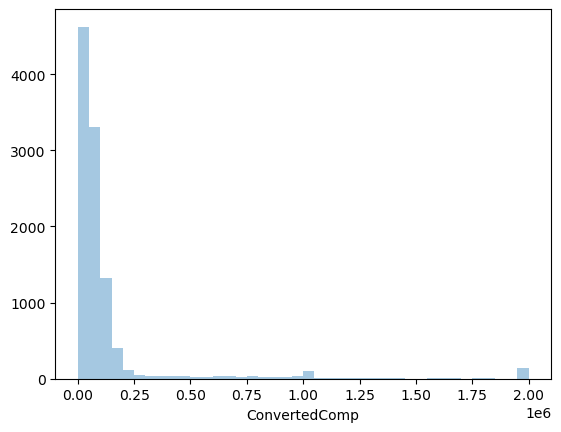

In [33]:
# your code goes here
import seaborn as sns

QUERY = """
SELECT ConvertedComp
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

sns.distplot(df['ConvertedComp'], bins=40, kde=False)

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:xlabel='Age'>

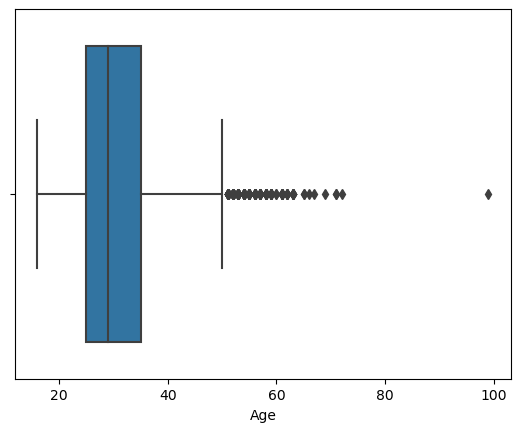

In [28]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
sns.boxplot(df['Age'])


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

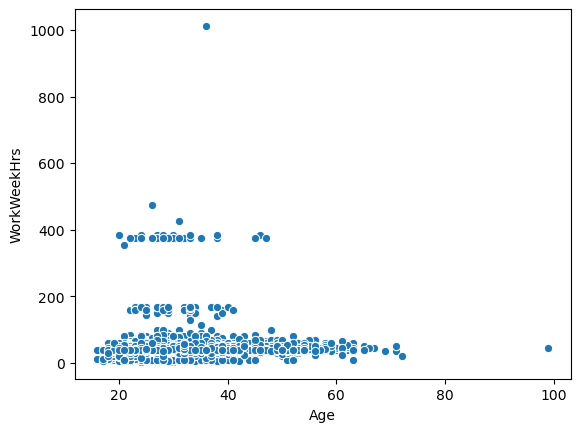

In [30]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(data=df, x='Age',y='WorkWeekHrs')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

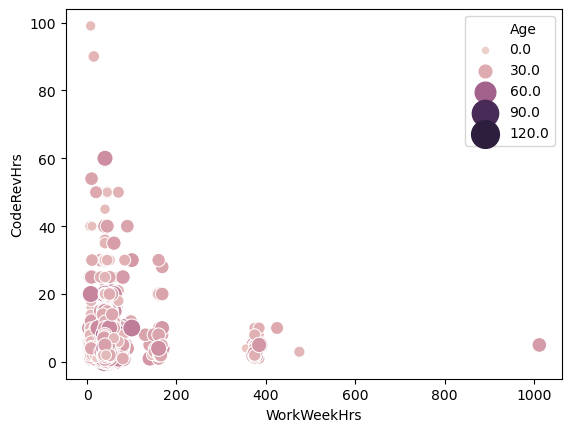

In [47]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
#WHERE WorkWeekHrs<=200 --- this can be inserted inside the query just to allow more visibility 
df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue ='Age', sizes=(20,400))

#sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue ='Age', sizes=(20,400))

<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

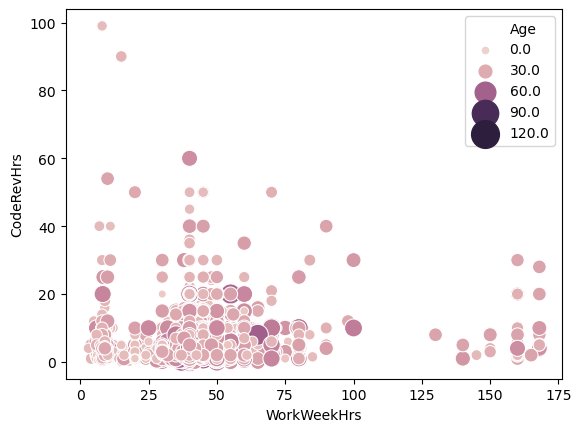

In [48]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE WorkWeekHrs<=200 
"""

df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue ='Age', sizes=(20,400))

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


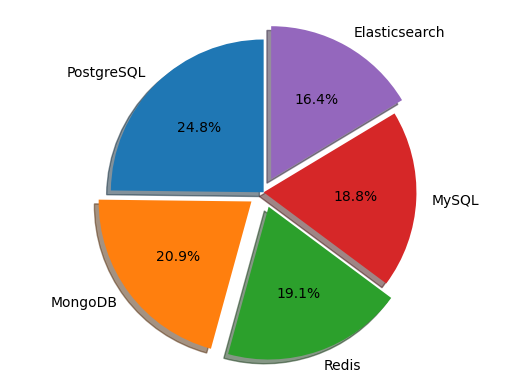

In [54]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline

QUERY = """
SELECT DatabaseDesireNextYear, count(*) as c1
FROM DataBaseDesireNextYear
group by DatabaseDesireNextYear
order by c1 DESC
"""
df = pd.read_sql_query(QUERY, conn)
#df.head()
# Create the chart
labels = df['DatabaseDesireNextYear'].head(5)
sizes = df['c1'].head(5)
explode = (0,0.1,0.1,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # equal so pie will be drawn as circle

plt.show()


In [60]:
#Most popularLanguages

QUERY = """
SELECT LanguageDesireNextYear, count(*) as c1
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by c1 DESC
"""
df = pd.read_sql_query(QUERY, conn)
df.head(10)


,LanguageDesireNextYear,c1
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088
5,C#,3591
6,Bash/Shell/PowerShell,3097
7,Java,2953
8,Go,2759
9,Kotlin,1890


In [66]:
QUERY = """
SELECT LanguageWorkedWith, count(*) as c2
FROM LanguageWorkedWith
group by LanguageWorkedWith
order by c2 DESC
"""
df = pd.read_sql_query(QUERY, conn)
df.head(10)

,LanguageWorkedWith,c2
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [70]:
QUERY = """
SELECT *
FROM DatabaseWorkedWith
order by Respondent
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

df2 = df.groupby(['Respondent']).sum()
df2[df2['DatabaseWorkedWith']=='MySQL'].count()

DatabaseWorkedWith    474
dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Text(0.5, 1.0, 'WorkWeek hours & CodeRevHrs')

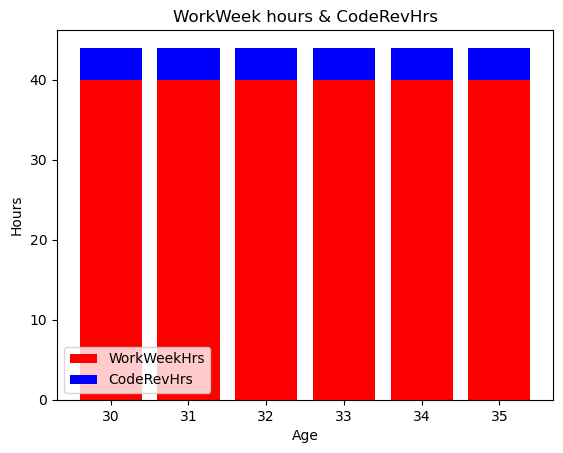

In [39]:
# your code goes here

import matplotlib.pyplot as plt

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE age <= 35 AND age >= 30
order by age
"""
df = pd.read_sql_query(QUERY, conn)

l1 = [30,31,32,33,34,35]
l2 = []
l3 = []

for i in l1:
    l2.append(df[df['Age']==i]['WorkWeekHrs'].median())
    l3.append(df[df['Age']==i]['CodeRevHrs'].median())

# Chart
labels = l1
y1 = l2
y2 = l3

plt.bar(labels, y1, color='r')
plt.bar(labels, y2, bottom=y1, color='b')
plt.legend(['WorkWeekHrs', 'CodeRevHrs'])
plt.xlabel('Age')
plt.ylabel('Hours')
plt.title('WorkWeek hours & CodeRevHrs')
#plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


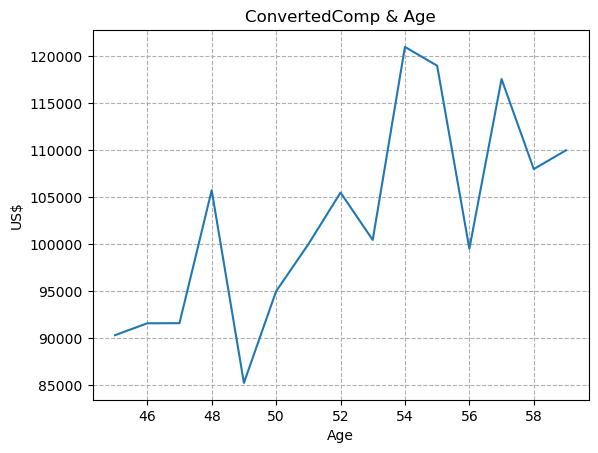

In [43]:
# your code goes here
QUERY = """
SELECT COnvertedComp, Age
FROM master
WHERE age <= 60 AND age >= 45
order by age
"""
df = pd.read_sql_query(QUERY, conn)

l1 = range(45, 60)
l2 = []

for i in l1:
    l2.append(df[df['Age']==i]['ConvertedComp'].median())

# Line chart
plt.figure()
plt.plot(l1, l2)

plt.xlabel('Age')
plt.ylabel('US$')
plt.title('ConvertedComp & Age')
plt.grid(True, linestyle='--')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


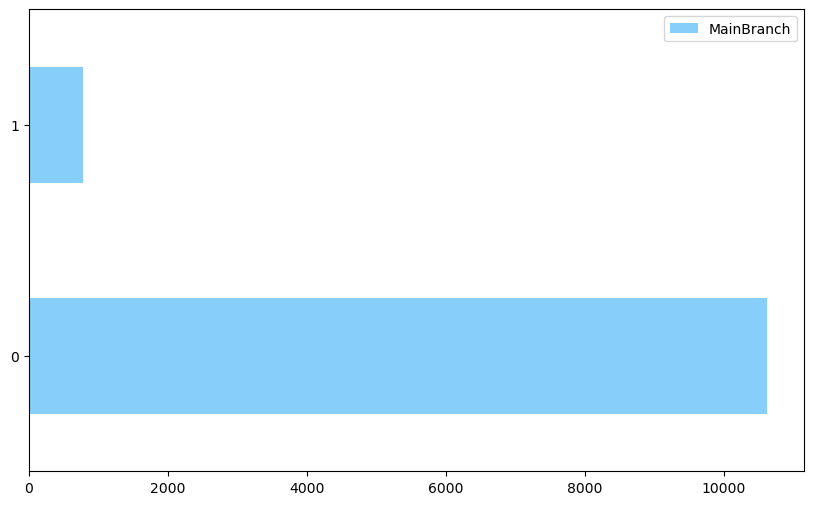

In [51]:
# your code goes here
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
FROM master
group by MainBranch
"""
df=pd.read_sql_query(QUERY, conn)

df.plot(kind='barh', figsize=(10,6), color='lightskyblue')

plt.show()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
